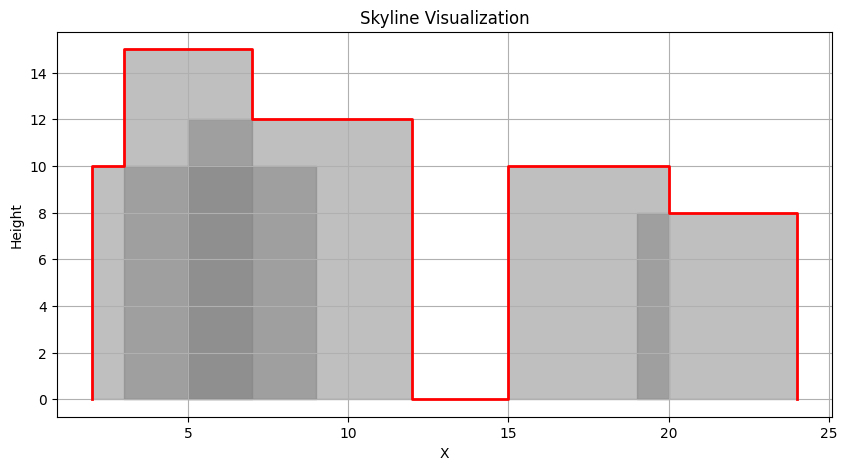

In [10]:
import matplotlib.pyplot as plt

def merge_skylines(left, right):
    """Merge two skylines efficiently."""
    h1 = h2 = 0  # Heights of current skyline segments
    i = j = 0
    merged = []
    
    while i < len(left) and j < len(right):
        if left[i][0] < right[j][0]:
            x, h1 = left[i]
            i += 1
        elif left[i][0] > right[j][0]:
            x, h2 = right[j]
            j += 1
        else:  # Both have the same x-coordinate
            x, h1 = left[i]
            h2 = right[j][1]
            i += 1
            j += 1
        max_h = max(h1, h2)
        if not merged or merged[-1][1] != max_h:
            merged.append((x, max_h))
    
    merged.extend(left[i:] or right[j:])  # Append remaining parts
    return merged

def get_skyline(buildings):
    """Divide and conquer solution to the skyline problem."""
    if not buildings:
        return []
    if len(buildings) == 1:
        x_left, x_right, h = buildings[0]
        return [(x_left, h), (x_right, 0)]

    mid = len(buildings) // 2
    left_skyline = get_skyline(buildings[:mid])
    right_skyline = get_skyline(buildings[mid:])
    return merge_skylines(left_skyline, right_skyline)

def plot_skyline(buildings, skyline):
    """Visualize buildings and the computed skyline."""
    fig, ax = plt.subplots(figsize=(10, 5))

    # Plot buildings as filled rectangles
    for x_left, x_right, h in buildings:
        ax.fill_between([x_left, x_right], h, color='gray', alpha=0.5)

    # Ensure the skyline starts from the ground level
    if skyline[0][1] > 0:
        skyline.insert(0, (skyline[0][0], 0))

    # Plot skyline
    x_vals, y_vals = zip(*skyline)
    ax.step(x_vals, y_vals, where='post', color='red', linewidth=2)

    ax.set_xlabel("X")
    ax.set_ylabel("Height")
    ax.set_title("Skyline Visualization")
    plt.grid()
    plt.show()


# Example Input
buildings = [(2, 9, 10), (3, 7, 15), (5, 12, 12), (15, 20, 10), (19, 24, 8)]
skyline = get_skyline(buildings)
plot_skyline(buildings, skyline)
